In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load dataset
df = pd.read_csv('data/ds_salaries.csv')

In [24]:
#view dataset
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [7]:
columns = df.columns.tolist()
columns

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [43]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [44]:
#checking for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
#drop unnecessary columns
df.drop(columns= {"Unnamed: 0","salary", "salary_currency" }, inplace=True)
df.drop(columns= {"salary", "salary_currency" }, inplace=True)

In [23]:
df.columns.to_list()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [27]:
#average salary calculation
avg_salary = df['salary_in_usd'].mean().round(2)
avg_salary

np.float64(112297.87)

In [41]:
#average salary for each job
df.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending=False)


job_title
Data Analytics Lead                         405000.00
Principal Data Engineer                     328333.33
Financial Data Analyst                      275000.00
Principal Data Scientist                    215242.43
Director of Data Science                    195074.00
Data Architect                              177873.91
Applied Data Scientist                      175655.00
Analytics Engineer                          175000.00
Data Specialist                             165000.00
Head of Data                                160162.60
Machine Learning Scientist                  158412.50
Data Science Manager                        158328.50
Director of Data Engineering                156738.00
Head of Data Science                        146718.75
Applied Machine Learning Scientist          142068.75
Lead Data Engineer                          139724.50
Data Analytics Manager                      127134.29
Cloud Data Engineer                         124647.00
Data Engineering M

In [40]:
#total salary for each job
df.groupby('job_title')['salary_in_usd'].sum().round(2).sort_values(ascending=False)

job_title
Data Scientist                              15470860
Data Engineer                               14879700
Data Analyst                                 9010627
Machine Learning Engineer                    4300086
Data Architect                               1956613
Data Science Manager                         1899942
Research Scientist                           1744312
Principal Data Scientist                     1506697
Director of Data Science                     1365518
Machine Learning Scientist                   1267300
Principal Data Engineer                       985000
Data Analytics Manager                        889940
Applied Data Scientist                        878275
Lead Data Engineer                            838347
Head of Data                                  800813
ML Engineer                                   705024
Analytics Engineer                            700000
Data Engineering Manager                      616136
Head of Data Science                

In [38]:
#count salary for each job
df.groupby('job_title')['salary_in_usd'].count().round(2).sort_values(ascending=False)

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Analytics Manager                        7
Data Science Consultant                       7
Director of Data Science                      7
Principal Data Scientist                      7
AI Scientist                                  7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Business Data Analyst                         5
Applied Data Scientist                        5
Head of Data                  

In [39]:
#median salary for each job
df.groupby('job_title')['salary_in_usd'].median().round(2).sort_values(ascending=False)


job_title
Data Analytics Lead                         405000.0
Financial Data Analyst                      275000.0
Head of Data                                200000.0
Principal Data Engineer                     200000.0
Data Architect                              180000.0
Analytics Engineer                          179850.0
Principal Data Scientist                    173762.0
Director of Data Science                    168000.0
Data Specialist                             165000.0
Applied Data Scientist                      157000.0
Director of Data Engineering                156738.0
Machine Learning Scientist                  156500.0
Data Science Manager                        155750.0
Data Engineering Manager                    150000.0
Head of Data Science                        138937.5
Cloud Data Engineer                         124647.0
Principal Data Analyst                      122500.0
Lead Data Engineer                          121593.5
Data Analytics Manager              

In [56]:
#Jobs in the US that have the highest salary
df[df['company_location']=='US'].nlargest(10, 'salary_in_usd')[['job_title', 'company_location','salary_in_usd']]

,job_title,company_location,salary_in_usd
252,Principal Data Engineer,US,600000
33,Research Scientist,US,450000
97,Financial Data Analyst,US,450000
157,Applied Machine Learning Scientist,US,423000
225,Principal Data Scientist,US,416000
63,Data Scientist,US,412000
523,Data Analytics Lead,US,405000
519,Applied Data Scientist,US,380000
25,Director of Data Science,US,325000
482,Data Engineer,US,324000


In [46]:
#Average salary in the different locations
df.groupby('company_location')['salary_in_usd'].mean().round(2).sort_values(ascending=False)

company_location
RU    157500.00
US    144055.26
NZ    125000.00
IL    119059.00
JP    114127.33
AU    108042.67
DZ    100000.00
AE    100000.00
IQ    100000.00
CA     99823.73
SG     89294.00
BE     85699.00
DE     81887.21
GB     81583.04
AT     72920.75
CN     71665.50
IE     71444.00
PL     66082.50
CH     64114.00
FR     63970.67
SI     63831.00
RO     60000.00
NL     54945.75
DK     54386.33
ES     53060.14
GR     52293.09
CZ     50937.00
PT     47793.75
HR     45618.00
LU     43942.67
CL     40038.00
MY     40000.00
IT     36366.50
HU     35735.00
EE     32974.00
MX     32123.33
NG     30000.00
IN     28581.75
MT     28369.00
CO     21844.00
TR     20096.67
HN     20000.00
BR     18602.67
AS     18053.00
MD     18000.00
UA     13400.00
PK     13333.33
KE      9272.00
IR      4000.00
VN      4000.00
Name: salary_in_usd, dtype: float64

In [48]:
#ranking the salary
df.nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd', 'company_location', 'experience_level','company_size']]

,job_title,salary_in_usd,company_location,experience_level,company_size
252,Principal Data Engineer,600000,US,EX,L
33,Research Scientist,450000,US,MI,M
97,Financial Data Analyst,450000,US,MI,L
157,Applied Machine Learning Scientist,423000,US,MI,L
225,Principal Data Scientist,416000,US,EX,S
63,Data Scientist,412000,US,SE,L
523,Data Analytics Lead,405000,US,SE,L
519,Applied Data Scientist,380000,US,SE,L
25,Director of Data Science,325000,US,EX,L
482,Data Engineer,324000,US,EX,M


In [52]:
#number of Principal Data Engineer in the US
df[df["job_title"]== 'Principal Data Engineer'].nlargest(10, "salary_in_usd")[["job_title", "company_location"]]

,job_title,company_location
252,Principal Data Engineer,US
121,Principal Data Engineer,US
215,Principal Data Engineer,US


Text(0.5, 1.0, 'Salary Distribution among Experience level')

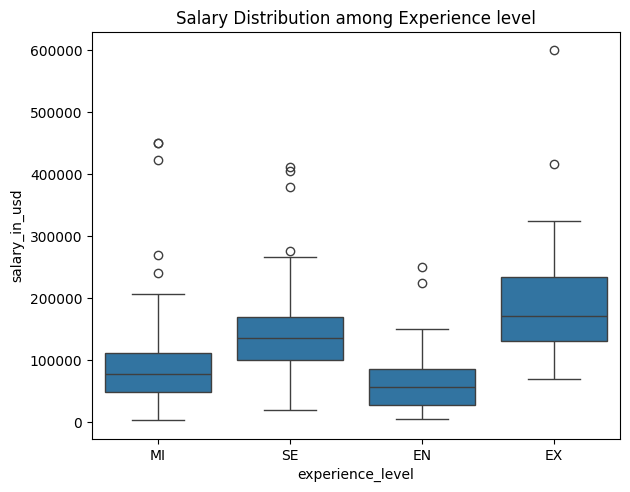

In [69]:
#Salary distribution among Experience level
sns.boxplot(x="experience_level", y='salary_in_usd', data=df)
plt.tight_layout()
plt.title("Salary Distribution among Experience level")

In [60]:
#Principal Data Engineer whos lives in US
df[(df["job_title"]== "Principal Data Engineer") & (df["employee_residence"]== "US")]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
121,2021,SE,FT,Principal Data Engineer,200000,US,100,US,M
215,2021,SE,FT,Principal Data Engineer,185000,US,100,US,L
252,2021,EX,FT,Principal Data Engineer,600000,US,100,US,L


(array([149., 228., 149.,  61.,  10.,   2.,   4.,   3.,   0.,   1.]),
 array([  2859. ,  62573.1, 122287.2, 182001.3, 241715.4, 301429.5,
        361143.6, 420857.7, 480571.8, 540285.9, 600000. ]),
 <BarContainer object of 10 artists>)

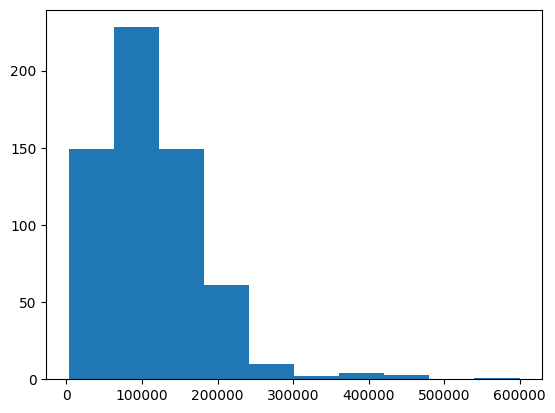

In [66]:
#showing the distribution of salary
plt.hist(df["salary_in_usd"])

In [68]:
#using query to find top 10 salaries for Data Scientist with Senior Experience level
df.query("job_title == 'Data Scientist' & experience_level == 'SE'").nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd', 'company_location', 'experience_level','company_size']]

,job_title,salary_in_usd,company_location,experience_level,company_size
63,Data Scientist,412000,US,SE,L
416,Data Scientist,260000,US,SE,M
486,Data Scientist,230000,US,SE,M
592,Data Scientist,230000,US,SE,M
472,Data Scientist,220000,US,SE,M
398,Data Scientist,215300,US,SE,L
444,Data Scientist,215300,US,SE,L
357,Data Scientist,211500,US,SE,M
570,Data Scientist,210000,US,SE,M
574,Data Scientist,210000,US,SE,M
